#### Import required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Custom RK_4 Solver Function

In [2]:
def RK4(f, x0, t0, tf, dt):
    
    # The arguments passed to the function are:-
    # f = points to the system of ODE's ()
    # x0 is a row vector containing initial values 
    # t0 = initial time; tf = final time
    # dt = step size(sampling time)
    
    
    t = np.arange(t0, tf+dt, dt)  #Creating a time vector starting from 't0' to 'tf' in step size of 'dt'
    
    
    
    nt = t.size   #Defining the dimensions of columns of the solution matrix
                  #given by length(size) of the time vector
    nx = x0.size  #Defining the dimensions of rows of the solution matrix 
                  #given by length(size) of the initial values vector(order of system)
    
    
    x = np.zeros((nx,nt)) #Defining the shape of the solution Matrix; 
    #the integrated values for the ascending samples are stacked columnwise
    #  .       
    #  .
    # x_1(t)
    #  .
    #  .
    x[:,0] = x0    #Initialising with the given initial values
    
    
    for k in range(nt-1):
        k1 = dt * f(t[k], x[:,k])
        k2 = dt * f(t[k] + dt/2, x[:,k] + k1/2)
        k3 = dt * f(t[k] + dt/2, x[:,k] + k2/2)
        k4 = dt * f(t[k] + dt, x[:,k] + k3)
        
        dx = (1/6) * ( (k1) + (2 * k2) + (2 * k3) + (k4) )   #incremental change
        x[:,k+1] = x[:,k] + dx   #update for next sample(iteration)
        
    return x,t  #Return the solution matrix and the time vector
    

#### Define the 'n'th order differential equation as 'n' 1st order differential equations (Specify the state space model equations)

In [3]:
def LVM(x,t):    #Defining your custom function which contains the system of ODE's
    
    
    p0 = 1.1*x[0] - 0.4*x[0]*x[1]   # x_dot = f(x,t); f = Non-Linear Function 
    p1 = 0.1*x[0]*x[1] - 0.4*x[1]   # x= [ x[0], x[1].....x[n] ] are the state variables
    
    xdot = np.array([p0, p1])   #The ODE's are stacked as elements of a row vector
    return xdot

#### Point to the differential equation model(state space model)

In [4]:
f = lambda t,x : LVM(x,t)    #Pointing to the function 'f'




#### Enter required values : Initial Condition, Initial Time, Final Time, Step Size

In [5]:
x0 = np.array([20, 5]) #Vector containing initial values
t0 = 0   #Initial Time
tf = 100 #Final Time
dt = 0.01 #Step Size


#### Invoke the RK4 function

In [6]:
x,t = RK4(f, x0, t0, tf, dt)

#### Plot required values

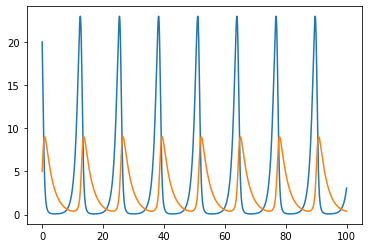

In [7]:
plt.plot(t, x[0,:], t, x[1,:])